<a href="https://colab.research.google.com/github/SameeshaKulasekara/DL_LAB2/blob/main/MLP_with_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1, l2 #import regulations
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns


Load the MNIST dataset

In [ ]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [0 7 5 4 0 3 5 6 3 3]


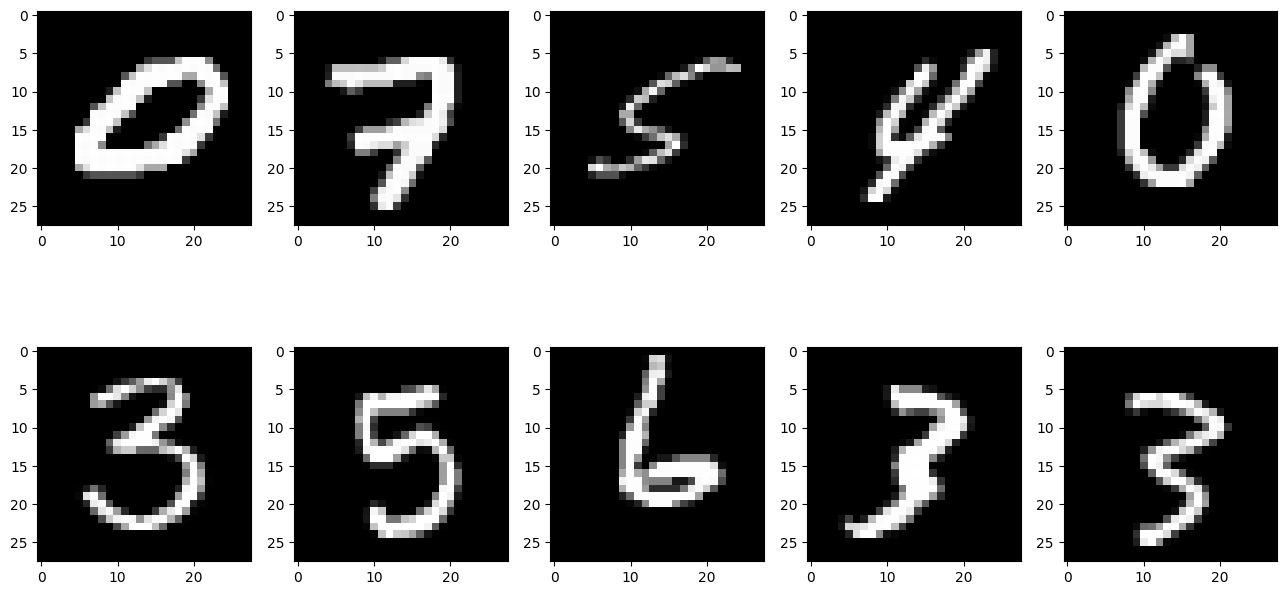

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [ ]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [155]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu', kernel_regularizer=l1(0.001) ))   # L1 regularization
model.add(Dense(32,input_dim=64,activation='relu', kernel_regularizer=l1(0.001)))    # L2 regularization
model.add(Dense(10,input_dim=32,activation='softmax', kernel_regularizer=l1(0.001))) # L1 regularization
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_42 (Dense)            (None, 64)                50240     
                                                                 
 dense_43 (Dense)            (None, 64)                4160      
                                                                 
 dense_44 (Dense)            (None, 32)                2080      
                                                                 
 dense_45 (Dense)            (None, 10)                330       
                                                                 
Total params: 56,810
Trainable params: 56,810
Non-trainable params: 0
_________________________________________________________________


Train the model

In [ ]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2836 - accuracy: 0.9179
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1277 - accuracy: 0.9617
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0935 - accuracy: 0.9715
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0757 - accuracy: 0.9768
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0627 - accuracy: 0.9804
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0539 - accuracy: 0.9827
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0467 - accuracy: 0.9850
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0410 - accuracy: 0.9867
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0351 - accuracy: 0.9889
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.032

Plot the loss and accuracy graphs

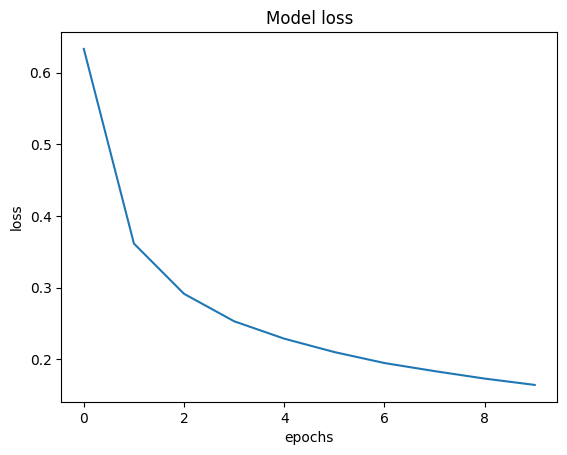

In [ ]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

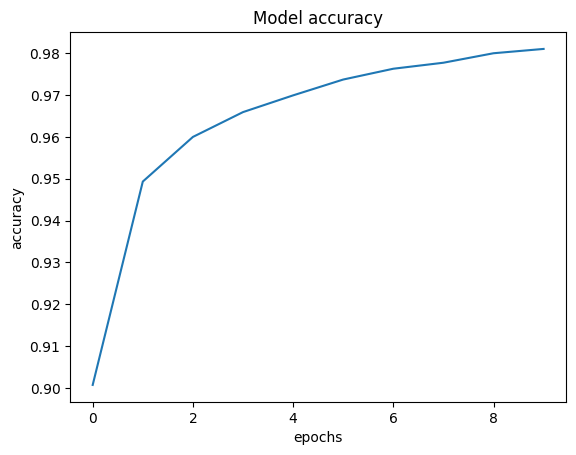

In [ ]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [ ]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.1901 - accuracy: 0.9724
Loss of the Test dataset is: 0.1900729387998581
Accuracy of the test dataset is: 0.9724000096321106


Save the model weights

In [ ]:
model.save_weights('MNIST_WEIGHTS_V1.h5')

#### Question 3

c.	Visualize class-wise test dataset performance using a confusion matrix




313/313 [==============================] - 1s 3ms/step


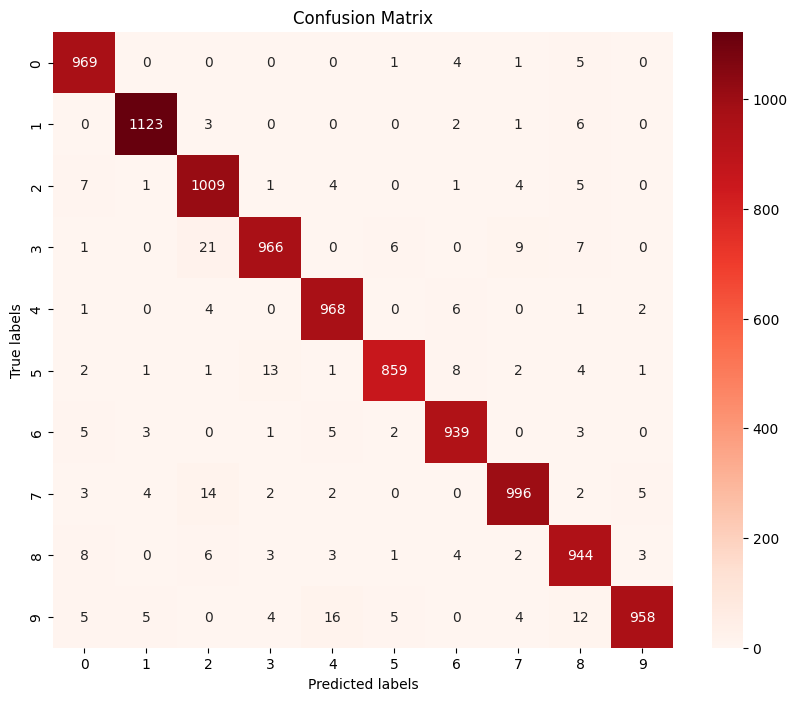

In [ ]:
# create the predictions on the test dataset
predictions = model.predict(new_test_data)
predicted_labels = np.argmax(predictions, axis=1)

# Generate the confusion matrix
confusion_mtx = confusion_matrix(test_target, predicted_labels)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Reds', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()